# 1. Regression

Regression - a short introduction

Regression predictive modeling has a goal to find a function f(X) capable to map a continuous output variable (y). The output variable is continuous and has real-value, such as an integer or floating-point. In pharmaceutical sciences, regression problem could be API dissolution from the dosage form, the bioavailability of drug after administration, affinity of the drug to a receptor, or enzyme expressed as IC50.

Regression problem requires to predict exact value of dependent variable/variables whereas independent variables could be real values od discrete. Regression problem could be turned into classification problem if needed.

To get a good understanding of further steps it's critical to know measures used to assess models' accuracy in regression problems.

\begin{equation*}
SSE = \sum (Obs-Pred)^2 
\end{equation*}

\begin{equation*}
MSE = \frac {\sum (Obs-Pred)^2} {n} 
\end{equation*}

\begin{equation*}
RMSE = \sqrt {\frac {\sum (Obs-Pred)^2} {n}}
\end{equation*}

\begin{equation*}
NRMSE = \frac {RMSE}{Obs_{max} - Obs_{min}}
\end{equation*}

R2 in regression is a statistical measure of how well the regression predictions approximate the real data points and can be interpreted what parto of variance observed in data is explained by the model. Value from 0 to 1.

\begin{equation*}
R^2 = 1 - \frac  {\sum (Obs-Pred)^2} {\sum (y_i - \overline{y})}
\end{equation*}

| X | Y observed |
| --- | --- | 
| 1.0 | 19.0 | 
| 1.5 | 31.0 | 
| 2.0 | 42.0 | 
| 2.5 | 48.0 | 
| 3.0 | 60.0 | 

\begin{equation*}
f(x)=20*x
\end{equation*}


| X | Y observed | Y predicted |
| --- | --- | --- |
| 1.0 | 19.0 | 20.0 |
| 1.5 | 31.0 | 30.0 | 
| 2.0 | 42.0 | 40.0 | 
| 2.5 | 48.0 | 50.0 | 
| 3.0 | 60.0 | 60.0 | 

# 2. Problem - solubility of chemical compounds in water

As a datests we have slightly modified version of data published in nature:

"AqSolDB, a curated reference set of aqueous solubility and 2D descriptors for a diverse set of compounds"

https://www.nature.com/articles/s41597-019-0151-1
    
![data.png](/img/data.png)

# 3. Packages we will use and explore

NumPy provides numerous ready to use solutions for performing numerical operations such as exponentiation, logarithmic, etc.
https://numpy.org/

Pandas provide a number of ready to use solutions for data analysis, including ready structures for data storage, quick statistical summary, record deletion.
https://pandas.pydata.org/

Scikit-learn provides a number of tools for data manipulation and data pre-processing as well as predictive models development, and evaluation.
https://scikit-learn.org/stable/

Matplotlib allows to prepare charts - we will use this visualization tool.
https://matplotlib.org/ 

Keras is an open-source neural network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML.Designed to enable fast experimentation with deep neural networks.
https://keras.io/

In [170]:
#Let's import all packages at the beginning of our class
import numpy as np 
import pandas as pd 
from sklearn import * 
import matplotlib.pyplot as plt
import keras

# 4. Data loading and cleaning

In the first stage, we load the data - if we opened the jupyter-notebook within the catalog where the data is located, then it is enough to provide the file name, if not then we must provide the full path.
In order to get familiar with data loading, I recommend carrying out the entire analysis process with the database extended by
additional independent variables: full_solubility_database.csv

In [99]:
raw_df = pd.read_csv("raw_simple_solubility_database.csv", sep=",")

After loading the data, we should display it to check if the process of data reading was correct and we got expected results, e.g. by entering the name of the previously created object.

In [171]:
raw_df

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,95.000000
1,Benzo[cd]indol-2(1H)-one,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,94.100000
2,4-chlorobenzaldehyde,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,935.000000
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,90.000000
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,9.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,compound95,82.146,2.1166,27.6080,6.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,NaN,1.0,0.00,38.868527,2.255145e+00,160.000000
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287e+00,8000.000000
10079,compound97,147.004,2.9934,36.4620,8.0,0.0,0.0,2.0,0.0,42.0,1.0,0.0,0.0,1.0,0.00,NaN,3.032456e+00,65.664275
10080,compound98,267.737,3.1408,68.7025,17.0,2.0,NaN,5.0,3.0,88.0,2.0,0.0,0.0,2.0,46.17,105.102402,2.269002e+00,24.986671


Let's see what methods can be called on our object by entering the object name and "dot", e.g. "raw_df." and pressing
the "tab" button displays the methods that we can choose for our object. Moreover, after entering the name of the chosen method, we have possibility to view documentation ("Shift + Tab"), with all definitions and useful explanations.

As part of the exercise, please modify the displayed record indicators to 3

In [172]:
raw_df.head() 

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,95.0
1,Benzo[cd]indol-2(1H)-one,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,94.1
2,4-chlorobenzaldehyde,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,935.0
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,90.0
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,9.2


Method * .tail() allows displaying the last n records from the DataFrame object

Please modify number of displayed records to 7

In [173]:
raw_df.tail()

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
10077,compound95,82.146,2.1166,27.6080,6.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,NaN,1.0,0.00,38.868527,2.255145,160.000000
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287,8000.000000
10079,compound97,147.004,2.9934,36.4620,8.0,0.0,0.0,2.0,0.0,42.0,1.0,0.0,0.0,1.0,0.00,NaN,3.032456,65.664275
10080,compound98,267.737,3.1408,68.7025,17.0,2.0,NaN,5.0,3.0,88.0,2.0,0.0,0.0,2.0,46.17,105.102402,2.269002,24.986671
10081,compound99,250.081,1.6534,57.4420,15.0,3.0,NaN,6.0,3.0,82.0,1.0,0.0,0.0,1.0,83.55,96.222642,2.923727,4400.283898


Method *.describe()  displays simple descriptive statistics data of the object like the number of records,  standard deviation, minimum and maximum value. Results are displayed for every column.

In [174]:
raw_df.describe()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
count,10078.000000,10070.000000,10075.000000,10078.000000,10076.000000,10079.000000,10073.000000,10078.000000,10077.000000,10071.000000,10072.000000,10079.000000,10080.000000,10072.000000,10077.000000,10080.000000,1.007800e+04
mean,266.314434,1.980162,66.699068,17.351558,3.480052,1.107352,5.190708,4.066382,94.101915,1.067521,0.291303,0.445084,1.512698,62.383138,108.769428,2.393914,1.001400e+05
std,183.692059,3.509959,46.398783,12.209435,3.488784,1.486856,4.723476,5.635699,64.571701,1.307760,0.876741,1.050867,1.640299,63.215878,76.256723,1.091029,5.813616e+05
min,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,4.400463e-08
25%,162.246000,0.621800,40.575750,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.596218,2.005094,1.284558e+01
50%,228.392000,1.950810,58.477400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.242052,2.539539,5.324762e+02
75%,320.347000,3.418140,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,1.200120e+04
max,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,3.770000e+07


It is worth to find out columns names, it can be used to select new subsets by specifying index numbers e.g. raw_df [raw_df.columns[1]]

In [175]:
raw_df.columns
raw_df.columns[1:2]

Index(['MolWt'], dtype='object')

In order to display records that meet a certain condition, e.g. a numerical value in a specific column, we can call code like below.

In [176]:
raw_df[raw_df.solubility_mg_L>1000]

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
12,"2,3-dimethylphenol; 2,4-dimethylphenol; 2,5-di...",733.002,12.05424,225.4848,54.0,6.0,6.0,6.0,0.0,288.0,6.0,0.0,0.0,6.0,121.38,322.890738,3.240000e-07,7669.999999
30,hydroxylamine,33.030,-0.66570,5.9739,2.0,2.0,2.0,2.0,0.0,14.0,0.0,0.0,0.0,0.0,46.25,12.462472,1.000000e+00,5700.000000
32,benzyl-tributylazanium; 4-hydroxynaphthalene-1...,499.717,6.85320,143.3074,35.0,4.0,1.0,6.0,12.0,192.0,3.0,0.0,0.0,3.0,77.43,211.312915,2.560000e-07,1140.000000
41,cyclohexanecarboxylic acid,128.171,1.65130,34.2108,9.0,1.0,1.0,2.0,1.0,52.0,0.0,1.0,1.0,1.0,37.30,54.878828,2.312192e+00,4600.000000
42,pentasodium 5-{[4-chloro-6-({3-[2-(sulfonatoox...,1136.328,-14.30130,212.8884,69.0,26.0,3.0,38.0,15.0,340.0,5.0,0.0,1.0,6.0,433.56,507.575472,4.760995e-06,441170.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,compound92,60.100,-0.65980,NaN,4.0,2.0,2.0,2.0,1.0,26.0,0.0,0.0,0.0,0.0,24.06,26.174054,1.974745e+00,999941.221342
10075,compound93,100.117,0.55450,25.9790,7.0,NaN,0.0,2.0,2.0,40.0,0.0,0.0,0.0,0.0,34.14,42.522064,3.577920e+00,66697.234592
10076,compound94,258.343,0.46640,67.1612,17.0,4.0,3.0,6.0,6.0,NaN,0.0,1.0,1.0,1.0,78.43,105.958624,2.832505e+00,1076.952871
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287e+00,8000.000000


We can also display the results in particular records/rows by iterating through them. The following example prints values of a column
MolWt representing the molar mass of a compound. 

Please display the name of the chemical substance.

In [177]:
for i, s in raw_df.iterrows():
    print(s["MolWt"])

392.51000000000016
169.18299999999996
140.569
756.2260000000003
422.52500000000015
118.179
170.25199999999995
376.4490000000001
218.202
342.39099999999996
149.19299999999996
192.25800000000004
733.0020000000003
206.285
260.255
154.253
214.648
660.2820000000003
180.556
228.332
218.362
136.238
202.138
150.47199999999995
181.235
604.1740000000002
195.476
136.238
386.62100000000015
258.402
33.03
192.21400000000003
499.71700000000016
184.279
570.3679999999998
366.50500000000017
220.356
158.24399999999994
95.94
198.306
148.249
128.17100000000002
1136.3280000000002
344.50199999999984
658.8910000000002
426.3480000000001
252.364
152.237
1026.263
868.35
189.324
256.342
298.427
502.30700000000013
215.168
148.16099999999997
192.258
178.275
196.29
166.264
140.22599999999997
268.312
488.67100000000033
284.399
891.500999999999
186.295
116.161
121.18299999999998
228.332
360.45000000000016
622.5880000000002
389.835
206.24099999999999
338.44400000000013
34.033
214.264
379.37500000000017
591.621000000000

196.29
222.372
254.326
161.12599999999995
227.779
246.2139999999999
230.304
336.231
170.21099999999996
135.20999999999998
123.155
88.14999999999998
168.15200000000004
126.155
453.836
236.355
192.302
172.18299999999996
154.13299999999995
110.971
464.8310000000001
168.19199999999995
214.30499999999995
212.25600000000003
180.247
170.25599999999997
220.385
183.11900000000003
192.25799999999998
152.15300000000005
76.14500000000002
136.14999999999998
174.28400000000005
172.27599999999995
168.28
878.3339999999994
206.285
122.439
227.33700000000002
150.17699999999996
118.13899999999997
129.075
210.664
113.54699999999998
163.003
1026.879
426.68200000000013
336.2630000000001
74.922
342.4790000000002
338.4000000000001
150.22099999999998
170.296
784.7170000000003
136.238
222.372
81.389
198.265
170.25499999999997
380.53200000000015
272.26
291.517
255.19800000000004
386.1100000000001
233.65400000000002
234.38299999999992
239.146
288.5610000000001
314.46600000000007
639.597
506.4340000000003
264.409


571.1220000000002
368.6460000000001
91.22399999999999
310.6910000000001
452.6390000000005
140.286
270.45699999999994
135.942
437.5840000000002
254.097
409.41900000000015
572.5250000000002
346.47000000000014
516.6880000000003
364.58600000000007
425.40500000000014
296.454
522.6760000000004
270.50099999999986
358.47500000000014
536.8820000000005
340.5040000000002
465.38300000000015
396.6120000000003
452.72000000000054
324.5490000000001
582.8160000000005
926.879
276.493
625.0360000000003
368.3480000000001
337.5920000000001
367.36400000000015
418.6180000000004
370.5740000000001
426.6820000000003
398.62800000000016
242.44699999999992
296.53899999999993
452.629
361.485
432.54500000000013
298.555
198.177
1177.6549999999984
393.65900000000016
565.1120000000002
1374.3029999999987
424.75800000000015
313.546
379.26300000000015
418.4730000000001
214.115
176.332
398.6280000000004
326.8640000000001
133.886
49.883
200.033
554.8530000000005
250.38199999999995
366.925
93.24
400.55900000000025
198.306
57

89.021
60.05200000000001
524.3930000000003
166.176
127.18699999999998
872.8580000000003
146.23
146.18599999999995
330.46599999999995
108.122
160.21299999999997
166.21999999999997
224.117
176.21499999999997
236.267
163.173
194.614
433.34300000000013
286.324
238.419
122.167
347.224
133.405
152.19299999999996
281.311
249.26999999999995
153.141
126.12300000000002
104.069
161.12599999999995
220.27200000000005
277.32
136.111
171.24299999999997
207.229
102.177
122.993
171.22099999999998
90.191
126.199
218.33700000000002
154.25299999999996
137.18199999999996
400.3430000000001
127.574
128.21499999999997
324.309
86.46799999999998
738.7730000000003
86.08999999999996
852.1720000000003
382.3290000000002
263.202
100.117
152.14899999999997
96.13299999999998
618.9820000000002
286.415
185.072
348.48400000000015
1369.148
325.8180000000001
102.13299999999998
201.31
111.188
249.04
554.9970000000005
244.264
199.988
160.167
82.10600000000002
305.8830000000001
110.95799999999998
102.133
1021.1790000000003
98

265.40099999999995
178.93
178.14
129.159
503.25900000000036
212.381
312.237
740.0010000000003
182.14700000000002
90.122
475.80200000000025
291.031
250.61900000000003
376.49400000000014
106.146
155.58100000000005
130.143
886.6319999999997
190.287
42.041000000000004
129.16299999999998
991.8320000000003
448.0910000000002
205.254
342.57600000000014
111.04
1941.6720000000025
191.271
182.651
229.233
134.131
232.376
241.423
252.665
332.35
388.45800000000014
232.27700000000002
96.061
1050.866
342.50500000000017
94.045
121.18
777.8350000000003
158.28899999999996
232.27700000000002
473.6610000000002
410.62100000000015
288.385
1247.436
1373.094
272.336
260.331
383.15500000000014
502.7370000000003
76.051
165.628
134.142
391.63700000000017
102.133
172.18
310.38000000000005
271.44499999999994
161.158
323.0200000000001
626.5540000000002
146.142
136.19799999999998
174.196
477.38300000000015
318.351
1168.9109999999996
681.6630000000002
299.547
1167.2440000000004
500.6740000000004
234.735
342.8060000000

143.189
261.394
186.21
230.31
305.834
160.17199999999997
165.236
209.252
196.24900000000002
199.209
166.176
173.171
157.21599999999995
173.64299999999997
283.538
162.188
226.231
263.12
193.246
265.35299999999995
264.06600000000003
277.147
228.67499999999995
311.164
146.23
346.46400000000006
116.12
121.18299999999999
163.003
146.14199999999997
217.888
147.43200000000004
89.13799999999998
110.54000000000002
87.12199999999999
86.134
182.175
145.24599999999995
159.18499999999997
356.05699999999996
116.15999999999998
118.13199999999998
144.21399999999997
98.10099999999998
166.21999999999997
154.253
302.52
122.16699999999996
161.031
123.11099999999998
390.38800000000003
184.14700000000002
207.016
184.103
150.22099999999998
150.22099999999998
136.23799999999997
166.13199999999995
117.19200000000001
104.11199999999998
104.11199999999998
116.16
115.176
200.621
289.375
184.23800000000003
212.252
162.27599999999995
158.289
292.42
137.22599999999997
185.355
185.064
121.18299999999996
149.192999999

165.19199999999995
124.13899999999997
160.17600000000004
152.149
227.43599999999995
149.218
118.179
124.13899999999997
134.134
102.13299999999998
160.16899999999995
346.46400000000017
244.331
116.15999999999998
329.906
144.25799999999995
281.862
102.177
116.20399999999998
130.191
116.20399999999998
130.231
88.15
90.078
91.066
88.15
88.10600000000002
238.455
111.09999999999998
138.166
126.115
95.10099999999998
232.364
174.196
102.177
100.117
102.17699999999998
105.093
138.99200000000002
94.541
94.541
116.20399999999998
162.22899999999996
174.196
88.14999999999998
88.14999999999998
130.18699999999998
160.16899999999995
96.173
110.2
184.367
212.421
228.42
366.71800000000013
506.9880000000006
167.85
217.84400000000002
269.351
116.164
303.9120000000001
584.6730000000006
213.192
142.18300000000005
126.155
123.111
116.15999999999998
102.177
163.311
144.12999999999997
214.349
246.359
77.05799999999998
449.6320000000004
180.159
136.19399999999996
127.10700000000001
74.079
117.14799999999998
119

163.093
266.22900000000004
112.21600000000001
105.093
147.13
239.101
206.245
223.165
245.92
237.212
179.21900000000005
180.203
223.22799999999995
204.65599999999998
199.09099999999995
206.266
187.582
260.935
221.25599999999997
238.26399999999992
224.237
173.171
220.055
130.23099999999997
172.22799999999995
304.06200000000007
174.15599999999995
170.16799999999995
319.2970000000002
102.093
380.9130000000001
64.065
256.17400000000004
166.20499999999996
144.12599999999995
296.2340000000001
211.22099999999998
176.21199999999996
221.232
211.349
211.475
253.808
146.14899999999997
194.36499999999995
137.18200000000002
127.014
203.197
20.006
98.07899999999998
165.19199999999995
200.15400000000002
173.21200000000005
314.274
206.628
311.85300000000007
28.014
249.68400000000003
141.94199999999995
31.998
70.906
224.149
147.43200000000004
516.6900000000003
442.60000000000014
174.28400000000005
99.133
144.21399999999997
110.971
144.12599999999995
270.28400000000005
241.87
494.0130000000003
141.132
14

291.992
326.437
326.437
326.437
360.88200000000006
360.88200000000006
360.88200000000006
360.88200000000006
395.32700000000017
395.32700000000017
429.77200000000016
429.77200000000016
395.32700000000017
263.91599999999994
210.616
312.251
237.08900000000003
232.239
328.24300000000005
376.45300000000015
361.4030000000001
127.147
447.91600000000017
290.68000000000006
193.63
240.28
256.27899999999994
272.278
200.62099999999995
344.75400000000013
301.296
326.437
198.15900000000002
259.306
131.175
360.80300000000005
447.74900000000014
162.22899999999996
162.156
278.30800000000005
206.289
306.318
352.88699999999994
383.366
387.39900000000017
418.73600000000016
171.28400000000005
418.5740000000001
314.216
384.58900000000006
376.496
289.3350000000001
288.347
234.343
248.37000000000003
262.397
276.42400000000004
290.451
239.702
401.83200000000016
189.174
295.77
338.7940000000001
332.4000000000001
118.176
422.87400000000014
431.31900000000013
410.4080000000001
381.11200000000014
399.5380000000001

196.46400000000003
166.176
242.23
124.13899999999997
104.458
193.128
197.38099999999997
390.3410000000002
135.166
210.285
99.089
202.282
152.22199999999995
321.9740000000001
459.75400000000025
321.9740000000001
253.084
390.86400000000015
356.41900000000015
305.975
321.9740000000001
326.437
213.236
242.23
214.246
218.25599999999997
113.12
281.35200000000003
164.37500000000003
217.268
236.136
112.08799999999998
123.15900000000002
308.38100000000014
149.215
375.87100000000015
323.13200000000006
334.4190000000001
231.299
403.97900000000016
284.42800000000005
188.23
284.428
214.206
437.5310000000002
266.257
255.324
254.355
180.167
147.13299999999995
407.50500000000017
310.3350000000001
354.7860000000002
324.38000000000005
270.339
122.12
165.236
136.11399999999998
271.342
394.4710000000002
314.37
288.255
264.31
280.309
296.3920000000001
253.283
290.3230000000001
372.50500000000017
394.43900000000014
476.58500000000015
109.128
199.122
138.126
138.126
184.107
153.137
122.12299999999998
184.107

445.771
445.77100000000013
361.35400000000016
345.42400000000015
372.80800000000005
267.331
428.4490000000001
461.14500000000015
461.02200000000016
406.2690000000002
296.332
473.40700000000015
853.9180000000001
99.177
114.232
114.19200000000001
117.14799999999998
114.188
164.15699999999995
204.31400000000002
151.253
279.846
102.093
117.14799999999998
164.986
194.072
116.12
132.11499999999998
211.986
242.403
132.11899999999997
160.16899999999995
198.30999999999992
174.15199999999996
196.202
270.45699999999994
142.11
193.41299999999998
284.48399999999987
99.089
196.29
102.093
186.27599999999995
170.16400000000004
244.331
122.167
109.13199999999998
109.13200000000002
310.522
125.131
228.248
180.156
127.103
128.13399999999996
237.35
134.134
146.52899999999997
134.13399999999996
274.361
164.204
210.233
153.18099999999995
149.19299999999996
214.29
272.4319999999999
224.26
150.17699999999996
150.17699999999996
150.17700000000005
150.181
151.19
228.317
151.19
274.40399999999994
142.11399999999

183.11900000000003
247.301
275.348
180.15599999999998
247.55
254.15
285.343
236.334
128.986
195.47600000000003
176.12400000000005
198.265
138.126
130.18699999999998
86.178
144.25799999999995
116.189
70.09100000000001
146.238
189.30700000000002
228.335
200.028
311.38100000000014
198.13400000000001
180.926
344.31900000000013
151.118
445.4680000000003
316.48500000000007
114.094
126.07700000000001
530.6580000000004
190.246
130.099
176.171
92.569
325.1910000000001
92.569
262.217
168.14799999999997
164.16400000000004
212.19799999999998
298.291
312.42
107.15599999999998
245.322
145.20199999999997
158.24099999999996
117.10399999999998
388.36900000000014
210.141
447.01000000000016
282.90599999999995
98.101
102.17699999999998
116.20399999999998
384.51600000000013
132.11499999999998
146.142
116.20399999999998
243.131
145.16099999999997
225.247
329.906
88.17399999999998
144.25799999999995
106.596
329.906
144.25799999999995
211.12900000000002
191.455
196.984
259.221
294.336
170.25499999999997
306.5

370.44900000000007
247.258
303.317
319.385
317.34400000000005
333.4120000000001
319.385
368.43300000000016
287.4060000000001
388.53600000000006
205.66600000000003
223.055
266.337
347.39000000000016
285.774
247.185
322.40800000000013
216.394
172.22799999999995
186.255
208.26400000000004
198.247
198.274
212.227
212.227
212.227
212.227
228.68200000000002
225.42
228.682
228.682
235.331
267.372
239.234
224.3919999999999
262.23400000000004
312.586
289.8060000000001
262.23400000000004
301.43000000000006
246.27
313.397
296.32599999999996
206.157
323.4360000000001
337.46300000000014
345.52700000000016
341.4260000000001
357.88100000000014
217.202
226.209
267.3719999999999
390.95800000000014
359.41600000000017
361.4850000000001
218.299
218.299
292.3160000000001
269.34399999999994
331.4120000000001
249.741
250.28300000000004
342.3950000000001
341.4070000000001
322.33799999999997
270.3
314.231
183.638
166.17999999999995
286.379
183.18699999999995
343.42300000000006
382.50400000000013
188.204
194.19

Columns names can be also printed using for loop. Modify the code in order to print just 10 column names starting from the first one.

In [178]:
for i in raw_df.columns:
    print(i)

Name
MolWt
MolLogP
MolMR
HeavyAtomCount
NumHAcceptors
NumHDonors
NumHeteroatoms
NumRotatableBonds
NumValenceElectrons
NumAromaticRings
NumSaturatedRings
NumAliphaticRings
RingCount
TPSA
LabuteASA
BalabanJ
solubility_mg_L


Now let's check if we have any missing values in our dataset. As you know it is very important step before further operations.

In [179]:
raw_df.isna().sum()

Name                    0
MolWt                   4
MolLogP                12
MolMR                   7
HeavyAtomCount          4
NumHAcceptors           6
NumHDonors              3
NumHeteroatoms          9
NumRotatableBonds       4
NumValenceElectrons     5
NumAromaticRings       11
NumSaturatedRings      10
NumAliphaticRings       3
RingCount               2
TPSA                   10
LabuteASA               5
BalabanJ                2
solubility_mg_L         4
dtype: int64

Let's try to print our records with empty cells. Modify the code so that it can print out all records with empty cells - maybe iterrows ()?

In [180]:
raw_df[raw_df.isna().any(axis=1)]

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
9982,compound0,221.322,1.1866,55.9083,14.0,3.0,2.0,5.0,NaN,84.0,0.0,1.0,1.0,1.0,66.40,85.831455,2.029093,184.000000
9983,compound1,214.294,0.3715,56.9234,14.0,6.0,1.0,6.0,1.0,78.0,1.0,0.0,NaN,1.0,73.80,86.688142,3.397091,1219.017700
9984,compound2,139.110,1.3004,34.7612,10.0,NaN,1.0,4.0,1.0,52.0,1.0,0.0,0.0,1.0,63.37,56.878613,3.003401,15971.965029
9985,compound3,228.288,2.2292,60.8740,16.0,4.0,0.0,NaN,8.0,92.0,0.0,0.0,0.0,0.0,52.60,96.614146,3.628216,11.090000
9986,compound4,110.971,1.9777,25.7130,5.0,0.0,0.0,2.0,1.0,30.0,0.0,NaN,0.0,0.0,0.00,41.386065,2.847379,2149.856635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,compound95,82.146,2.1166,27.6080,6.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,NaN,1.0,0.00,38.868527,2.255145,160.000000
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287,8000.000000
10079,compound97,147.004,2.9934,36.4620,8.0,0.0,0.0,2.0,0.0,42.0,1.0,0.0,0.0,1.0,0.00,NaN,3.032456,65.664275
10080,compound98,267.737,3.1408,68.7025,17.0,2.0,NaN,5.0,3.0,88.0,2.0,0.0,0.0,2.0,46.17,105.102402,2.269002,24.986671


There are several methods for dealing with missing values. We will delete all records where at least one cell is empty. As part of the exercise, I recommend trying other methods as exercise. 

We create a new df object containing data after the process of deleting records with empty cells.

In [181]:
df=raw_df.dropna(axis=0, how='any', inplace=False)

Let's check how our data looks now.

In [182]:
df.describe()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9.982000e+03
mean,266.665946,1.979167,66.794594,17.374674,3.486776,1.108595,5.196955,4.073031,94.243438,1.068323,0.292627,0.447606,1.515929,62.458601,108.912586,2.392199,1.003622e+05
std,184.179024,3.517738,46.523021,12.241536,3.498203,1.488973,4.736275,5.646925,64.748563,1.309427,0.879599,1.054667,1.644334,63.348307,76.462726,1.091123,5.837046e+05
min,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,4.400463e-08
25%,162.276000,0.619750,40.602475,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.623721,2.004357,1.259900e+01
50%,228.682000,1.949220,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.299873,2.539539,5.332473e+02
75%,320.436000,3.419030,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,1.200120e+04
max,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,3.770000e+07


Let's see how our dependent/output variable looks like - numerically

In [183]:
df.solubility_mg_L.describe()

count    9.982000e+03
mean     1.003622e+05
std      5.837046e+05
min      4.400463e-08
25%      1.259900e+01
50%      5.332473e+02
75%      1.200120e+04
max      3.770000e+07
Name: solubility_mg_L, dtype: float64

Let's see how our dependent/output variable looks like - graphically

(array([9.967e+03, 1.000e+01, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.40046342e-08, 3.77000000e+06, 7.54000000e+06, 1.13100000e+07,
        1.50800000e+07, 1.88500000e+07, 2.26200000e+07, 2.63900000e+07,
        3.01600000e+07, 3.39300000e+07, 3.77000000e+07]),
 <a list of 10 Patch objects>)

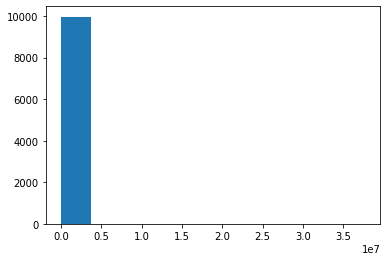

In [184]:
plt.hist(df.solubility_mg_L)

Let's transform our output variable - the logarithm should reduce the range of max-min values, and additionally, based on our knowledge of the solubility problem, let's convert mg/L solubility to molar solubility (S)

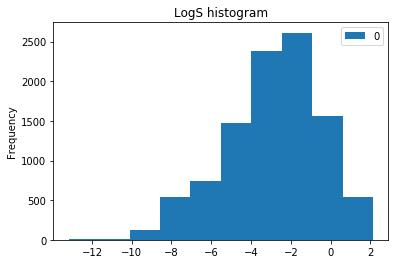

In [143]:
LogS=np.log10(df.solubility_mg_L/1000/df.MolWt)

Let's assign LogS as a DataFrame to object and let's check again how newly created variable looks numerically and graphically.

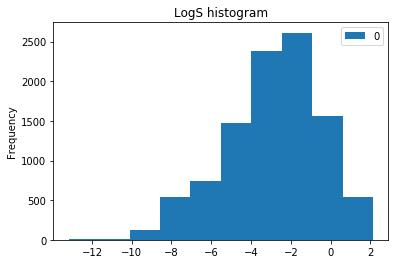

In [185]:
LogS=pd.DataFrame(LogS)
LogS.describe()
LogS.plot(kind="hist", title="LogS histogram")

The initial data preparation can be considered as complete, it's time to create two objects containing independent variables (X) and dependent (Y)

In [186]:
X=df[df.columns[1:17]]
Y=LogS

Of course it is possible in an easy way to transform the distribution of our data to "normal" distribution. We can use QuantileTransformer method from scikit-learn package. Let's make it as homework and if you want to play with data and models please transform output variable (Y) to normally distributed one and repeat all modeling steps. Remember that to compare results it's necessary reverse transformation. Below I present an example of code to transform our LogS output variable into normally distributed and code to reverse this mathematical operation.

(array([1.000e+00, 8.000e+00, 1.800e+02, 1.303e+03, 3.502e+03, 3.499e+03,
        1.302e+03, 1.820e+02, 4.000e+00, 1.000e+00]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <a list of 10 Patch objects>)

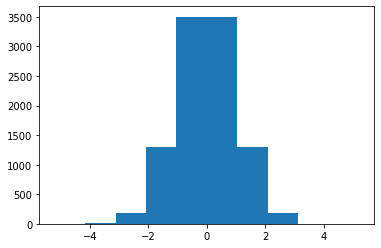

In [187]:
normalD_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
Y_norm = normalD_transformer.fit_transform(LogS)
plt.hist(Y_norm)

(array([   4.,   11.,  124.,  538.,  738., 1478., 2382., 2612., 1561.,
         534.]),
 array([-13.1719    , -11.64094184, -10.10998368,  -8.57902551,
         -7.04806735,  -5.51710919,  -3.98615103,  -2.45519287,
         -0.9242347 ,   0.60672346,   2.13768162]),
 <a list of 10 Patch objects>)

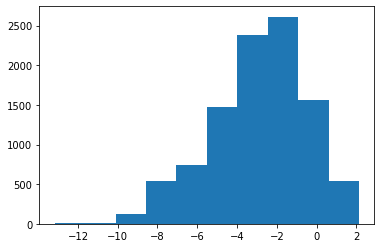

In [188]:
LogS=normalD_transformer.inverse_transform(Y_norm)
plt.hist(LogS)

# 5. Model development - linear regression

Linear regression is the simples way to develop model representing relationship between response and one or more explanatory variables. Model has a structure as follows and generally the aim in model development is to minimize sum of squared error of the model

\begin{equation*}
f(w, x) = w_0 + w_1 * x_1 + ... + w_i * x_i
\end{equation*}

\begin{equation*}
\min || X * w - y||^2
\end{equation*}

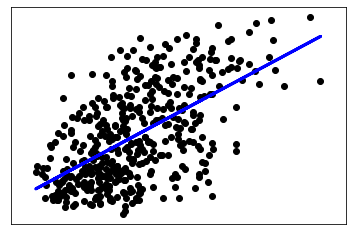

We start model development by defining the object and then calling *.fit() method, which allows us to learn it/match to data.

In [232]:
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Let's check what is the model structure

In [233]:
print(reg.coef_, reg.intercept_)

[[-0.00483823 -0.45543546  0.02279459 -0.03219148  0.14205969  0.12243226
  -0.06330249 -0.02259244  0.02132051 -0.17542452 -0.06181049 -0.1063883
  -0.15500978 -0.00361012 -0.01426212  0.04104454]] [-1.71222639]


In order to interpret obtained values let's assign weights values to variables from dataset.

In [235]:
data=pd.DataFrame(reg.coef_, columns=X.columns)
data

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ
0,-0.004838,-0.455435,0.022795,-0.032191,0.14206,0.122432,-0.063302,-0.022592,0.021321,-0.175425,-0.06181,-0.106388,-0.15501,-0.00361,-0.014262,0.041045


The final step is to check model predictions

In [208]:
y_pred = reg.predict(X)

Let's print it

In [209]:
y_pred

array([[-3.56314862],
       [-3.39556817],
       [-2.94848479],
       ...,
       [-2.79351987],
       [-3.91675935],
       [-3.80109092]])

Let's compare the predicted values ​​with the actual (observed) values.

In [210]:
results=pd.DataFrame(y_pred, columns=["Predicted"])
results["Observed"]=Y
results

,Predicted,Observed
0,-3.563149,-3.616127
1,-3.395568,-3.254767
2,-2.948485,-2.177078
3,-7.177482,-3.924409
4,-4.200199,-4.662065
...,...,...
9977,-2.511387,-3.010000
9978,-1.626737,-2.930000
9979,-2.793520,-2.190000
9980,-3.916759,-3.980000


It remains for us to answer the question of how good the model is :) Scikit-learn provides a huge collection of metrics for model evaluation: .metrics. *
Let's start from a graphical examination.

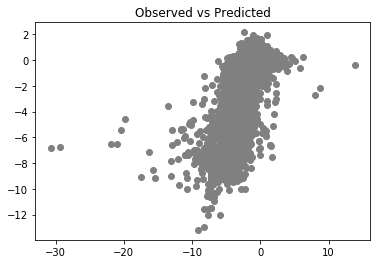

In [211]:
plt.scatter(x=y_pred, y=Y,  color='gray')
plt.title("Observed vs Predicted")
plt.show()

Let's define our own RMSE function - just to see how to do that.

In [212]:
def RMSE (res):
    return np.sqrt(np.sum(np.power(res.Observed-res.Predicted, 2))/res.shape[0])
RMSE(results)

1.7044643068553436

Let's prepare a uniform version of the metrics that we will use to evaluate models in a systematic process of data analysis. So far our model has only been fitted to the data so let's define its results as learning results. 

In [213]:
print("Learn metrics")
print('R2:', metrics.r2_score(Y, y_pred))  
print('RMSE:', metrics.mean_squared_error(y_pred, Y, squared=False))
print("NRMSE: %.2f %%" % (metrics.mean_squared_error(y_pred, Y, squared=False)/(Y.values.max()-Y.values.min())*100))

Learn metrics
R2: 0.4819170669147337
RMSE: 1.7044643068553436
NRMSE: 11.13 %


Because we will repeat model assessment many times, it is worth writing a function that will take care of the appropriate calculation and print results in a unified way.

In [26]:
def modelResults (metrics_type, observed, predicted):
    print(metrics_type)
    print('R2:', metrics.r2_score(observed, predicted))  
    print('RMSE:', metrics.mean_squared_error(predicted, observed, squared=False))
    print("NRMSE: %.2f %%" % (metrics.mean_squared_error(predicted, observed, squared=False)/(observed.values.max()-observed.values.min())*100))

Let's check if it works

In [214]:
modelResults("Learn metrics", Y, y_pred)

Learn metrics
R2: 0.4819170669147337
RMSE: 1.7044643068553436
NRMSE: 11.13 %


We already have model assessment measures but it's hard to interpret them. Let's try to run a numerical experiment.
We will build a model using the same methodology but the data will be random - in this way, we will check whether the data carry any
valuable information and whether the methodology used is correct.

We create DataFrame object with random data. Please experiment with the range of random numbers and check if it matters. Then build a model and assess it

Learn metrics
R2: 0.0011374491424707145
RMSE: 2.3666886808507908
NRMSE: 15.46 %


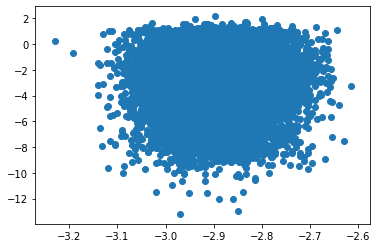

In [215]:
X_rand = pd.DataFrame(np.random.randint(0,100,size=X.shape), columns=X.columns)

regRand = linear_model.LinearRegression(normalize=True)
regRand.fit(X_rand, Y)
y_pred = regRand.predict(X_rand)

modelResults("Learn metrics", Y, y_pred)
plt.scatter(x=y_pred, y=Y)
plt.show()

Please note the differences in RMSE, NRMSE, and R2 values ​​for the model learned on random and real data. Any conclusions? 

# 6. Learning and testing of the model

So far, we have not been testing how the model will behave under real conditions, i.e. how will it predict LogS for "new" chemical compounds. To mimic such conditions it is recommended to split the dataset into test and learn parts. Remember about shuffle parameter!

In [216]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.25, random_state=1, shuffle=True)

Let's create model and compare learn-test results

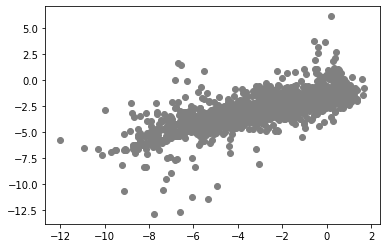

Learn metrics
R2: 0.47110352145905343
RMSE: 1.7320344181821767
NRMSE: 11.31 %
Test metrics
R2: 0.5243645720587453
RMSE: 1.5951008232825235
NRMSE: 11.64 %


In [221]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, shuffle=True)
regTest = linear_model.LinearRegression(normalize=True)
regTest.fit(X_train, y_train)

y_pred = pd.DataFrame(regTest.predict(X_test))
y_learn_pred = pd.DataFrame(regTest.predict(X_train))

plt.scatter(y_test, y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)


If we run the above code several times, we will see some changes. They result from a random distribution of data to learn and test subsets. To minimize this variation, we introduce k-cross cross-validation methods.
Thanks to this, the assessment of our models during testing and the selection of optimal model parameters will be less burdened
with the phenomenon of random division of data into learning and test sets.

In [223]:
cv = model_selection.KFold(n_splits=10, shuffle=True)
scores = model_selection.cross_validate(regTest, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
print(-scores['test_neg_root_mean_squared_error'].mean())
print(scores['test_r2'].mean())

1.7342385527716329
0.4596960961789701


Please run the above code several times. What do you observe?

# 7. Model complexity and regularization

The linear regression model will basically use all independent variables to predict the value of a variable
subsidiary. Let's see if the problem can be simplified by using a different type of regression: Lasso


\begin{equation*}
f(w, x) = w_0 + w_1 * x_1 + ... + w_i * x_i
\end{equation*}

The Lasso is a linear model that estimates sparse coefficients. It is useful if solutions with fewer non-zero coefficients is preferred.
Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

\begin{equation*}
\min || X * w - y||^2 + \alpha * ||w||
\end{equation*}

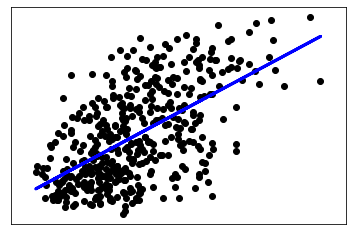

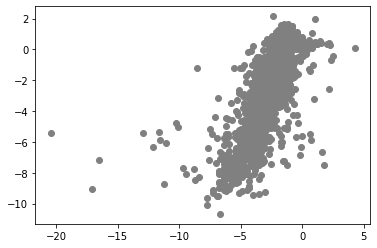

Learn metrics
R2: 0.4776664963856623
RMSE: 1.7069509856128224
NRMSE: 11.32 %
Test metrics
R2: 0.4945012186336082
RMSE: 1.7011507234032153
NRMSE: 13.29 %


In [224]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=1, shuffle=True)

regLasso = linear_model.Lasso(alpha=0.02)
regLasso.fit(X_train, y_train)
y_pred = pd.DataFrame(regLasso.predict(X_test))
y_learn_pred = pd.DataFrame(regLasso.predict(X_train))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)


Let's see if our model uses all variables or maybe some have been excluded due to the process
regulrayzacji? What conclusions/hypotheses can we draw?

In [236]:
results=pd.DataFrame(regLasso.coef_, index=X.columns)
results

,0
MolWt,-0.004739
MolLogP,-0.446652
MolMR,0.024041
HeavyAtomCount,-0.000000
NumHAcceptors,0.127457
NumHDonors,0.113140
NumHeteroatoms,-0.036733
NumRotatableBonds,-0.013196
NumValenceElectrons,0.017761
NumAromaticRings,-0.015436


In case of Lasso regression, the alpha parameter appears, which will influence model structure and learning process - gradient optimization. Let's see what the alpha optimal value is - we are trying to optimize/tune model parameters. Of course, we will use
10-cv method "" "

In [237]:
cv = model_selection.KFold(n_splits=10, shuffle=True)
for i in np.arange(0.02, 5, 0.02):
    reg = linear_model.Lasso(alpha=i, max_iter=10000)
    scores = model_selection.cross_validate(reg, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("R2:", scores['test_r2'].mean())

Alpha: 0.02
RMSE: 1.7274902218555748
R2: 0.46501828458736866
Alpha: 0.04
RMSE: 1.7322952383672505
R2: 0.46234224236953125
Alpha: 0.06
RMSE: 1.736234923305568
R2: 0.4579235279789343
Alpha: 0.08
RMSE: 1.733989615937697
R2: 0.46306997528353583
Alpha: 0.1
RMSE: 1.7389480080643387
R2: 0.45684812621431625
Alpha: 0.12000000000000001
RMSE: 1.7366005011307926
R2: 0.46037420206468604
Alpha: 0.13999999999999999
RMSE: 1.7453393381753592
R2: 0.45398083839128817
Alpha: 0.16
RMSE: 1.7463269453334038
R2: 0.4538920843367248
Alpha: 0.18
RMSE: 1.7490656771183244
R2: 0.4520441960814191
Alpha: 0.19999999999999998
RMSE: 1.753696101920759
R2: 0.4489315180480153
Alpha: 0.22
RMSE: 1.7516124784403644
R2: 0.4491262921568149
Alpha: 0.24
RMSE: 1.7564249833207743
R2: 0.4464183253669449
Alpha: 0.26
RMSE: 1.755883652163271
R2: 0.44824099868369593
Alpha: 0.28
RMSE: 1.7530714434769596
R2: 0.45043521053212326
Alpha: 0.30000000000000004
RMSE: 1.75800663701866
R2: 0.4467392939695144
Alpha: 0.32
RMSE: 1.7555000309090392
R2

Alpha: 2.62
RMSE: 1.9095438240881026
R2: 0.34834657597308744
Alpha: 2.64
RMSE: 1.9124110600477167
R2: 0.3453248600480545
Alpha: 2.66
RMSE: 1.9093367964761359
R2: 0.34760323972155965
Alpha: 2.68
RMSE: 1.9080049232617546
R2: 0.34962715982904513
Alpha: 2.7
RMSE: 1.9089632258107259
R2: 0.34909702362570794
Alpha: 2.72
RMSE: 1.9088074757632527
R2: 0.34873443780690955
Alpha: 2.74
RMSE: 1.9104488045593286
R2: 0.34750221628548317
Alpha: 2.7600000000000002
RMSE: 1.909506289114756
R2: 0.3479107256849923
Alpha: 2.7800000000000002
RMSE: 1.910710811227677
R2: 0.34625089320601155
Alpha: 2.8000000000000003
RMSE: 1.910157967833829
R2: 0.3470041555611521
Alpha: 2.8200000000000003
RMSE: 1.9086807442532532
R2: 0.34956056869900193
Alpha: 2.84
RMSE: 1.9112917419492483
R2: 0.34712220194625365
Alpha: 2.86
RMSE: 1.9163477139044922
R2: 0.3427571753546901
Alpha: 2.88
RMSE: 1.9110213371397695
R2: 0.34723036332742013
Alpha: 2.9
RMSE: 1.9111853448551692
R2: 0.34670923533845294
Alpha: 2.92
RMSE: 1.9109390885723148
R

Please see how easily we can add more model models to our systematic process. I encourage you to add
the additional module responsible for teaching/testing a different method model and parameter tuning :)

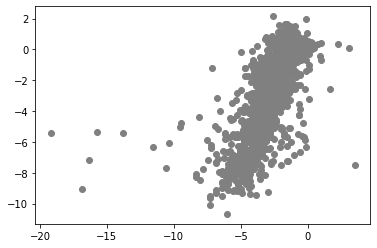

Learn metrics
R2: 0.4776664963856623
RMSE: 1.7069509856128224
NRMSE: 11.32 %
Test metrics
R2: 0.47036525336065094
RMSE: 1.7412894642531769
NRMSE: 13.61 %


In [37]:
regEl = linear_model.ElasticNet(alpha=0.5, l1_ratio=0.5)
regEl.fit(X_train, y_train)
y_pred = regEl.predict(X_test)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

# 8. Feature engineering - polynomials

One possible way to improve model predictions is to create new variables. The easiest way to do that is to play with features and expand it into a polynomial expression which means getting from equation 1 to equation 2. Is such wai it is also possible that some nonlinear dependencies will become linear.

\begin{equation*}
f(w, x) = w_0 + w_1 * x_1 + w_2 * x_2 + ... (1)
\end{equation*}



\begin{equation*}
f(w, x) = w_0 + w_1 * x_1 + w_2 * x_2 + w_3 * x_1^2 + w_4 * x_2^2 + w_5x_1*x_2 + ... (2)
\end{equation*}

In [238]:
X_poly=preprocessing.PolynomialFeatures(interaction_only=False).fit_transform(X)

In [239]:
X_poly.shape

(9982, 153)

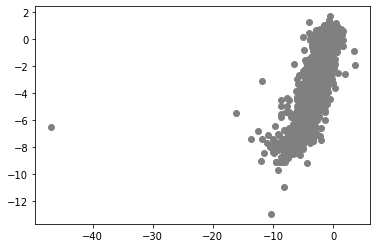

Learn metrics
R2: 0.6969549988089989
RMSE: 1.3088803293641262
NRMSE: 8.55 %
Test metrics
R2: 0.5126479284973144
RMSE: 1.625949605923638
NRMSE: 11.10 %


In [240]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X_poly, Y, test_size=0.20, random_state=42, shuffle=True)

regPoly = linear_model.LinearRegression()
regPoly.fit(X_train, y_train)
y_pred = regPoly.predict(X_test)
y_learn_pred = regPoly.predict(X_train)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

Please note the values ​​of the learning and testing metrics - the model may be too much adapted to learning data - overfitted

Let's see the Lasso regression model. Please check if there are big differences between the learning and testing metrics.

In [241]:
cv = model_selection.KFold(n_splits=10, shuffle=True)
for i in np.arange(0.05, 1, 0.05):
    regLass = linear_model.Lasso(alpha=i, max_iter=1000, tol=0.5)
    scores = model_selection.cross_validate(regLass, X=X_poly, y=Y, cv=cv, 
                                            return_train_score=True, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("learn_RMSE:", -scores['train_neg_root_mean_squared_error'].mean())
    print("test_RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("learn_R2:", scores['test_r2'].mean())
    print("test_R2:", scores['test_r2'].mean())

Alpha: 0.05
learn_RMSE: 1.4724170423300644
test_RMSE: 1.5385006812896238
learn_R2: 0.5731904745416366
test_R2: 0.5731904745416366
Alpha: 0.1
learn_RMSE: 1.4736978184212508
test_RMSE: 1.5460000171091912
learn_R2: 0.5699938822058648
test_R2: 0.5699938822058648
Alpha: 0.15000000000000002
learn_RMSE: 1.476751808482599
test_RMSE: 1.5273295876071482
learn_R2: 0.5813667465393552
test_R2: 0.5813667465393552
Alpha: 0.2
learn_RMSE: 1.479914253652936
test_RMSE: 1.5259486176299166
learn_R2: 0.5836733096429569
test_R2: 0.5836733096429569
Alpha: 0.25
learn_RMSE: 1.482990092040766
test_RMSE: 1.5261231984384955
learn_R2: 0.5826065369243386
test_R2: 0.5826065369243386
Alpha: 0.3
learn_RMSE: 1.485833967082261
test_RMSE: 1.534519388072147
learn_R2: 0.5787430195184531
test_R2: 0.5787430195184531
Alpha: 0.35000000000000003
learn_RMSE: 1.489329871300127
test_RMSE: 1.535861840131425
learn_R2: 0.5779752752378313
test_R2: 0.5779752752378313
Alpha: 0.4
learn_RMSE: 1.4934201785109948
test_RMSE: 1.539823739303491

The optimal alpha value was 0.15 - estimated based on RMSE and R2 testing error

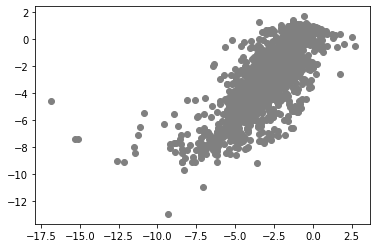

Learn metrics
R2: 0.6969549988089989
RMSE: 1.3088803293641262
NRMSE: 8.55 %
Test metrics
R2: 0.6000860221423996
RMSE: 1.4728854259004909
NRMSE: 10.05 %


In [242]:
reg = linear_model.Lasso(alpha=0.15, max_iter=1000, tol=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = pd.DataFrame(reg.predict(X_train))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [243]:
scores

{'fit_time': array([0.03128338, 0.03476262, 0.0314672 , 0.02915168, 0.02896786,
        0.03160477, 0.03046823, 0.02950382, 0.03090072, 0.03089547]),
 'score_time': array([0.00333714, 0.00318193, 0.00300765, 0.00289154, 0.00387645,
        0.00300479, 0.00280046, 0.00346398, 0.00306821, 0.00366735]),
 'test_neg_root_mean_squared_error': array([-1.59433245, -1.56314481, -1.48786659, -1.57108416, -1.54227023,
        -1.58696369, -1.74296515, -1.58295381, -1.6429214 , -1.56776421]),
 'train_neg_root_mean_squared_error': array([-1.55563603, -1.55820057, -1.56428031, -1.56219437, -1.55940699,
        -1.55580982, -1.55226887, -1.55546793, -1.54904266, -1.55289937]),
 'test_r2': array([0.57000939, 0.54481516, 0.59781804, 0.57557517, 0.55907258,
        0.546115  , 0.45407529, 0.56093525, 0.5417958 , 0.53760429]),
 'train_r2': array([0.5656846 , 0.56906531, 0.56448381, 0.56292856, 0.56816475,
        0.56878115, 0.57066349, 0.56768338, 0.56952407, 0.57238675])}

# 9. Neural networks - MLP

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset. It is a universal approximator of any function. General work principles rely on feedforward signal propagation to predict and backward error propagation to adjust weights and adapt to problems/data.

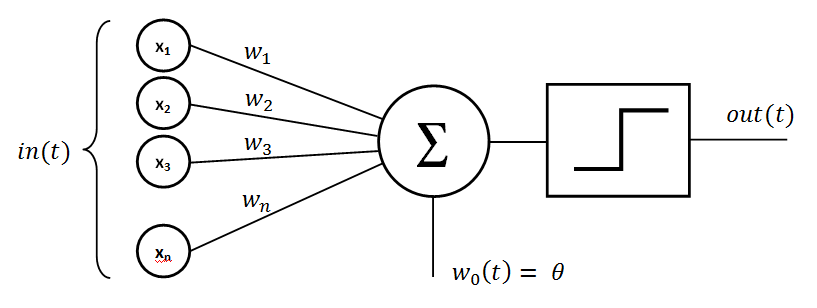

Source: https://pl.wikipedia.org/wiki/Perceptron#/media/Plik:Perceptron_moj.png

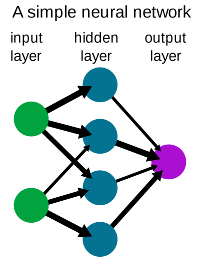

Source: https://en.wikipedia.org/wiki/Neural_network

Let's move on to the subject of artificial neural networks. The process is analogous - with the difference of the data scaling requirement

In [244]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=42, shuffle=True)

We scale the data and create the MinMaxScaler object - separately for X and Y. In the case of scaling new data, e.g.
to test the model we have to use the defined object for scaling (taught on training data)

In [245]:
scalerX=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerX.fit(X_train)
X_train_scaled=scalerX.transform(X_train)
X_test_scaled=scalerX.transform(X_test)

scalerY=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerY.fit(y_train)
y_train_scaled=scalerY.transform(y_train)
y_test_scaled=scalerY.transform(y_test)

We create a neural network - please take a look what parameters can be modified - optimized/tuned

Remember that after prediction, we need to scale the data again to calculate the actual values
predicted by the model: scaler * .inverse_transform

/home/adam/anaconda3new/envs/LM/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adam/anaconda3new/envs/LM/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


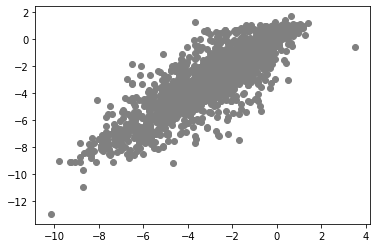

Learn metrics
R2: 0.6969549988089989
RMSE: 1.3088803293641262
NRMSE: 8.55 %
Test metrics
R2: 0.7508928231207518
RMSE: 1.1624620745039325
NRMSE: 7.93 %


In [246]:
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(100, 50, 30), activation='relu', solver='lbfgs',
                            max_iter=1000)

mlp.fit(X_train_scaled, y_train_scaled)


y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

Please check what model metrics are. What if we use X_poly dataset instead?

Let's try to optimize the architecture of the model. I suggest subjecting other parameters of the model to modifications such as the number of iterations, activation function, type of learning algorithm etc. Here it begins to be interesting :) 

In [247]:
cv = model_selection.KFold(n_splits=10, shuffle=True)
architectures=[(5,5,5), (10,10,10), (20, 10, 7)]
for i in architectures:

    mlp=neural_network.MLPRegressor(hidden_layer_sizes=i, activation='relu', solver='lbfgs',
                                max_iter=2000)

    scores = model_selection.cross_validate(mlp, X=X_train_scaled, y=y_train_scaled.ravel(), cv=cv, 
                                            return_train_score=True, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Architecture: " , i)
    print("learn_RMSE:", -scores['train_neg_root_mean_squared_error'].mean())
    print("test_RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("learn_R2:", scores['test_r2'].mean())
    print("test_R2:", scores['test_r2'].mean())



Architecture:  (5, 5, 5)
learn_RMSE: 0.09074090091293262
test_RMSE: 0.09139803458793835
learn_R2: 0.65278754194315
test_R2: 0.65278754194315
Architecture:  (10, 10, 10)
learn_RMSE: 0.08191560058998563
test_RMSE: 0.08411049818807387
learn_R2: 0.7057846316837685
test_R2: 0.7057846316837685
Architecture:  (20, 10, 7)
learn_RMSE: 0.09018533434842194
test_RMSE: 0.09190385346278887
learn_R2: 0.6290339336804789
test_R2: 0.6290339336804789


Let's check the best model's/architecture's performance during testing

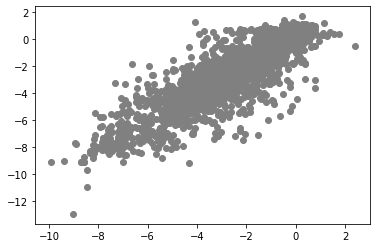

Learn metrics
R2: 0.6969549988089989
RMSE: 1.3088803293641262
NRMSE: 8.55 %
Test metrics
R2: 0.7213834016823867
RMSE: 1.229388554844428
NRMSE: 8.39 %


In [250]:
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(10, 10, 10), activation='relu', solver='lbfgs',
                            max_iter=2000)

mlp.fit(X_train_scaled, y_train_scaled.ravel())

y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

Now please choose one additional method of building the model and introduce it to your systematic approach


# 10. Deep Neural Networks

In [251]:
def DNN_model():
    # create model
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(100, input_dim=16, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(keras.layers.Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
dnn = keras.wrappers.scikit_learn.KerasRegressor(build_fn=baseline_model, verbose=1)

dnn.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=1000)

Epoch 1/10
7985/7985 [==============================] - 5s 583us/step - loss: 0.1018
Epoch 2/10
7985/7985 [==============================] - 4s 480us/step - loss: 0.0270
Epoch 3/10
7985/7985 [==============================] - 4s 498us/step - loss: 0.0196
Epoch 4/10
7985/7985 [==============================] - 4s 518us/step - loss: 0.0147
Epoch 5/10
7985/7985 [==============================] - 4s 504us/step - loss: 0.0123
Epoch 6/10
7985/7985 [==============================] - 4s 509us/step - loss: 0.0110
Epoch 7/10
7985/7985 [==============================] - 4s 523us/step - loss: 0.0103
Epoch 8/10
7985/7985 [==============================] - 4s 532us/step - loss: 0.0096
Epoch 9/10
7985/7985 [==============================] - 4s 536us/step - loss: 0.0094
Epoch 10/10
7985/7985 [==============================] - 4s 535us/step - loss: 0.0089


7985/7985 [==============================] - 5s 579us/step


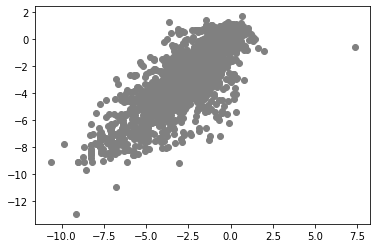

Learn metrics
R2: 0.6969549988089989
RMSE: 1.3088803293641262
NRMSE: 8.55 %
Test metrics
R2: 0.6270401003380416
RMSE: 1.42238362068844
NRMSE: 9.71 %


In [252]:
y_pred = scalerY.inverse_transform(dnn.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(dnn.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

Questions and suggestions are highly welcome! adam.paclawski@uj.edu.pl